In [107]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor

clip = genfromtxt('clip.csv', delimiter=',')
resnet = genfromtxt('resnet.csv', delimiter=',')

In [11]:
def plot_corr(data):
    f = plt.figure(figsize=(19, 15))
    plt.matshow(data, fignum=f.number, cmap='seismic')
    cb = plt.colorbar()
    plt.title('Correlation Matrix', fontsize=16)
    plt.clim(-1,1)

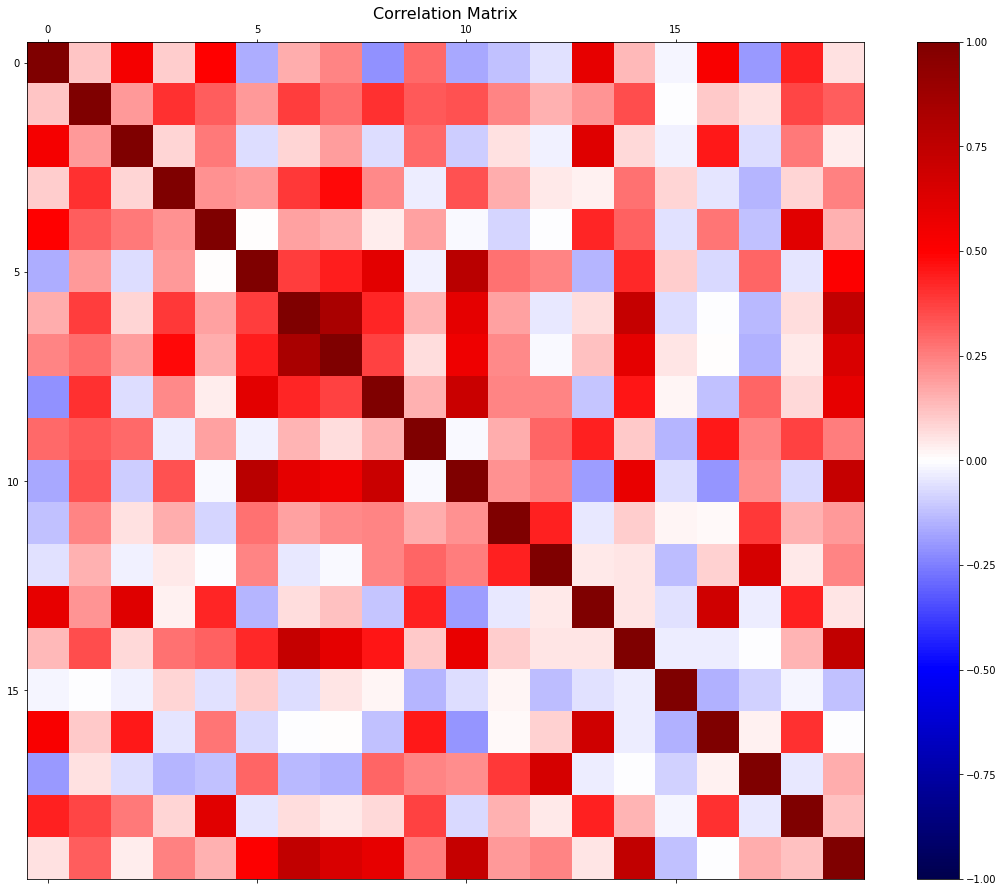

In [12]:
plot_corr(resnet)

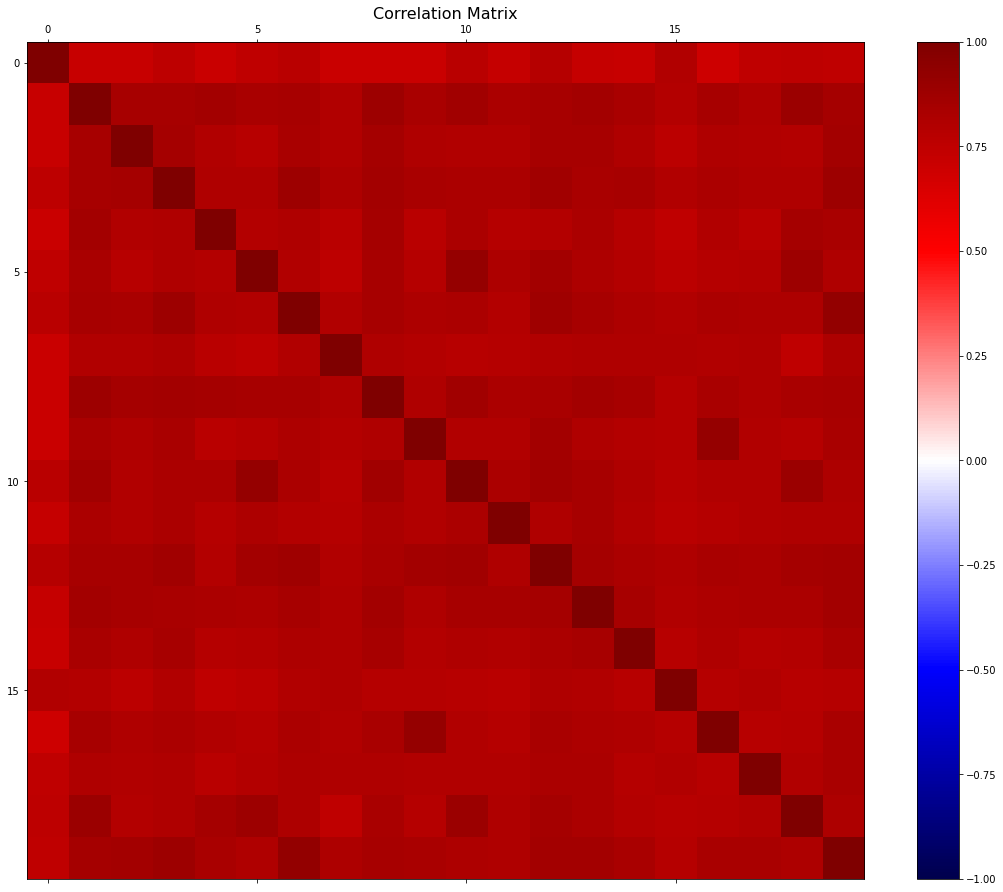

In [13]:
plot_corr(clip)

In [15]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-bywqalxw
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-bywqalxw
  Resolved https://github.com/openai/CLIP.git to commit b46f5ac7587d2e1862f8b7b1573179d80dcdd620
  Preparing metadata (setup.py) ... done
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [84]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/16", device=device)

classes = ['llasdksdvkvsadfuyvafuvyawffawen', 'sofa', 'horse', 'aeroplane', 'boat', 'sheep', 'cat', 'bus', 'diningtable', 'bird', 'motorbike', 'dog', 'pottedplant', 'car', 'person', 'bottle', 'chair', 'bicycle', 'tvmonitor', 'cow', 'train']
promts = [f'a photo of a {c}' for c in classes]
text = clip.tokenize(promts).to(device)

with torch.no_grad():
    text_features = model.encode_text(text)

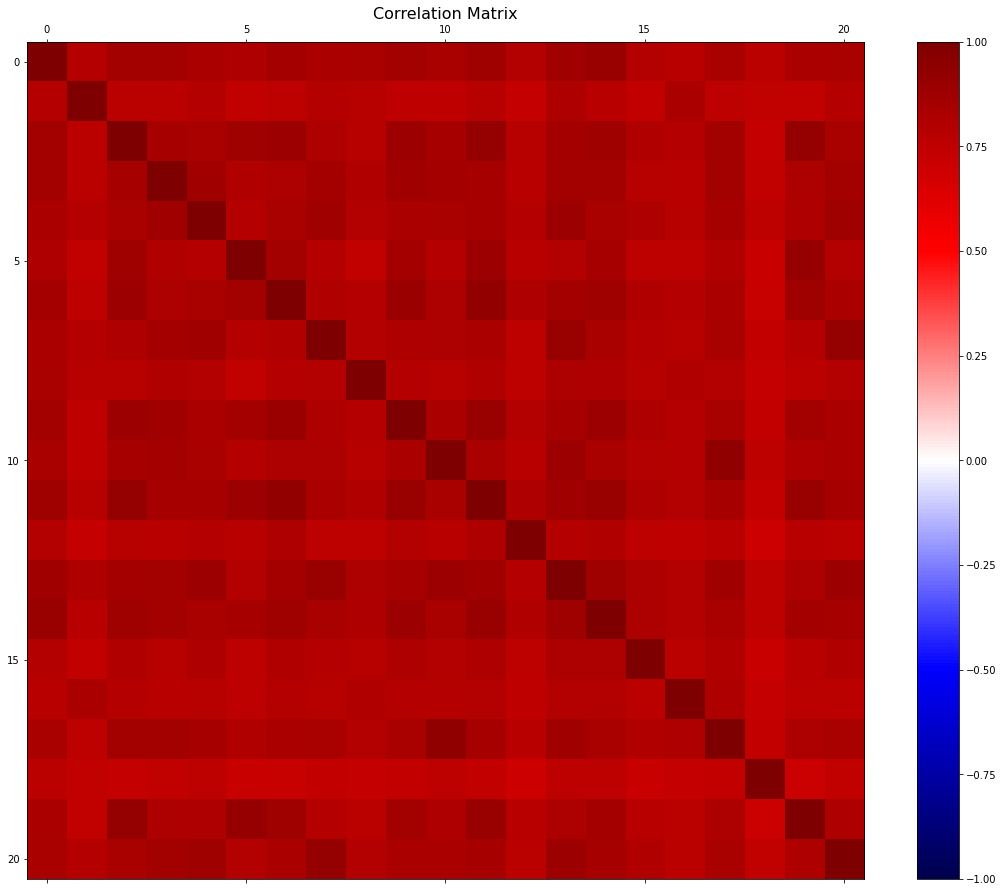

In [85]:
from sklearn.metrics.pairwise import cosine_similarity

corr = cosine_similarity(text_features.cpu().data.numpy(), text_features.cpu().data.numpy())
plot_corr(corr)

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import clip
from PIL import Image



device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image = Image.open("dalle2.jpeg")
image_p = preprocess(image).unsqueeze(0).to(device)
cats = ['sofa', 'horse', 'aeroplane', 'boat', 'sheep', 'cat', 'bus', 'diningtable', 'bird', 'motorbike', 'dog', 'pottedplant', 'car', 'person', 'bottle', 'chair', 'bicycle', 'tvmonitor', 'cow', 'train']
text = clip.tokenize(cats).to(device)

with torch.no_grad():
    image_features = model.encode_image(image_p)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image_p, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

In [130]:
len(cats)

21

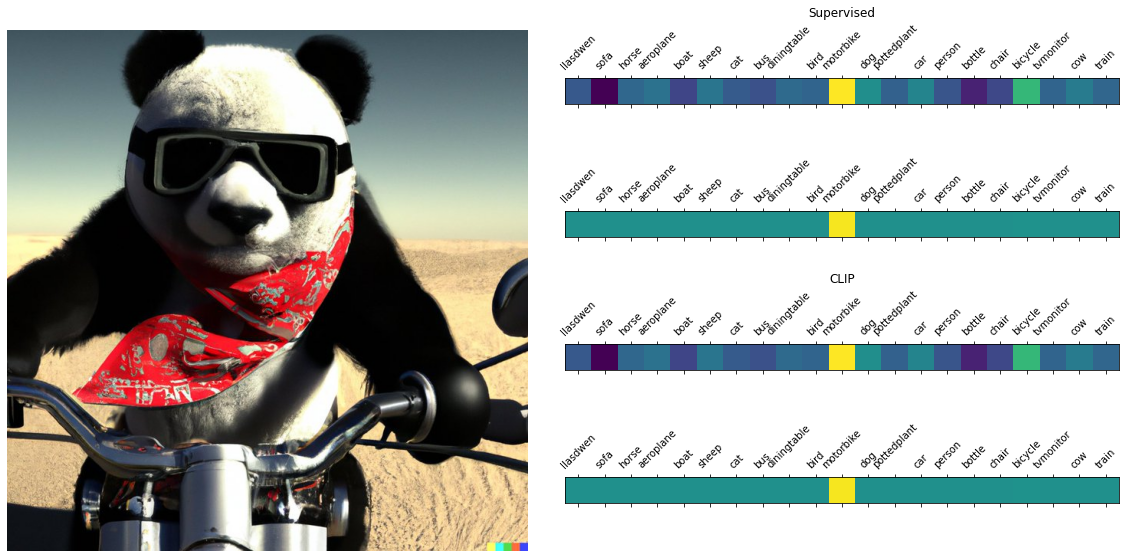

In [129]:
# fig, ax = plt.subplots(3, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [10, 1, 1]})

fig = plt.figure(figsize=(16, 8))

ax1 = plt.subplot2grid((4, 2), (0, 0), rowspan=4)
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax3 = plt.subplot2grid((4, 2), (1, 1))
ax4 = plt.subplot2grid((4, 2), (2, 1))
ax5 = plt.subplot2grid((4, 2), (3, 1))

ax1.imshow(torch.permute(ToTensor()(image), (1, 2, 0)))
ax1.set_axis_off()

ax2.matshow(logits_per_image.cpu().numpy())
ax2.set_yticks([])
ax2.set_xticks(np.arange(len(cats)), cats, rotation=45)
ax2.title.set_text('Supervised')
ax3.matshow(probs, vmin=-1, vmax=1)
ax3.set_yticks([])
ax3.set_xticks(np.arange(len(cats)), cats, rotation=45)

ax4.matshow(logits_per_image.cpu().numpy())
ax4.set_yticks([])
ax4.set_xticks(np.arange(len(cats)), cats, rotation=45)
ax4.title.set_text('CLIP')
ax5.matshow(probs, vmin=-1, vmax=1)
ax5.set_yticks([])
ax5.set_xticks(np.arange(len(cats)), cats, rotation=45)

plt.tight_layout()


In [67]:
probs

array([[3.2017536e-03, 6.4893470e-06, 3.4880399e-04, 5.7611696e-04,
        7.7347882e-05, 6.6932919e-04, 2.0076754e-04, 1.2638338e-04,
        3.9956573e-04, 2.9671181e-04, 9.6983802e-01, 2.3052394e-03,
        2.5918888e-04, 1.4058088e-03, 1.4674857e-04, 2.0365427e-05,
        8.6156237e-05, 1.8481204e-02, 2.9591998e-04, 9.2380733e-04,
        3.3420388e-04]], dtype=float32)

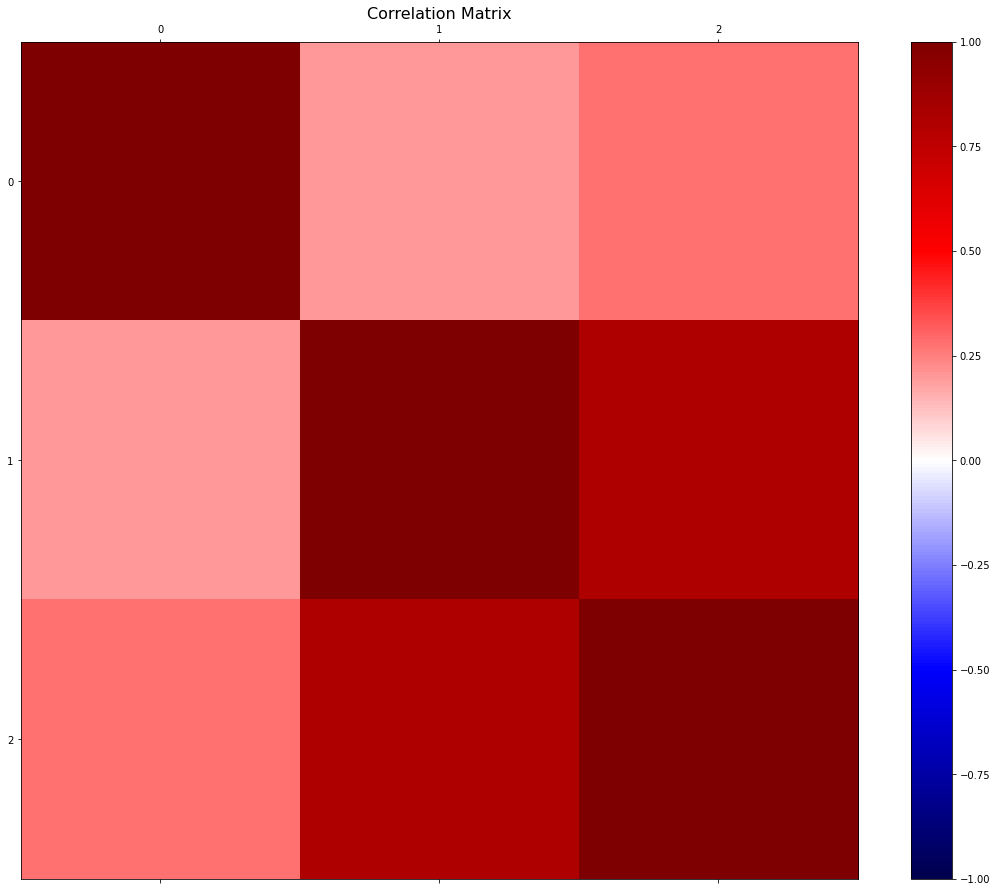

In [80]:
data = torch.stack([image_features[0], text_features[9], text_features[10]]).cpu().numpy()
corr = cosine_similarity(data, data)
plot_corr(corr)

In [81]:
corr

array([[1.0000002 , 0.19653669, 0.2774581 ],
       [0.19653669, 1.0000002 , 0.80748147],
       [0.2774581 , 0.80748147, 0.9999999 ]], dtype=float32)

In [173]:
model, preprocess = clip.load("ViT-B/32", device=device)
image = Image.open("../tmp/imgs/000001.jpg_cropped.png")
image_p = preprocess(image).unsqueeze(0).to(device)
cats = ['aeroplane', 'bicycle', 'boat', 'bottle', 'car', 'cat', 'chair', 'diningtable', 'dog', 'horse', 'person', 'pottedplant', 'sheep', 'train', 'tvmonitor', 'bird', 'bus', 'cow', 'motorbike', 'sofa']
text = clip.tokenize(cats).to(device)
print(text)

from scipy.special import softmax

with torch.no_grad():
    image_features = model.encode_image(image_p)
    text_features = model.encode_text(text)
#     print(image_features)
    print(text_features)
    
    logits_per_image = cosine_similarity(image_features.cpu().data.numpy(), text_features.cpu().data.numpy())
    
#     logits_per_image, logits_per_text = model(image_p, text)
    probs = softmax(logits_per_image*100)
    probs = torch.tensor(logits_per_image).softmax(dim=-1).numpy()

tensor([[49406, 27735,  3980,  ...,     0,     0,     0],
        [49406, 11652, 49407,  ...,     0,     0,     0],
        [49406,  4440, 49407,  ...,     0,     0,     0],
        ...,
        [49406,  9706, 49407,  ...,     0,     0,     0],
        [49406, 33341, 49407,  ...,     0,     0,     0],
        [49406, 15723, 49407,  ...,     0,     0,     0]], dtype=torch.int32)
tensor([[ 0.0699,  0.0547, -0.0293,  ..., -0.0502, -0.1329, -0.1464],
        [ 0.0911, -0.1337,  0.1300,  ...,  0.1283,  0.2222, -0.2397],
        [ 0.0692, -0.0423,  0.1795,  ..., -0.0904, -0.0715, -0.1546],
        ...,
        [ 0.0943, -0.0038,  0.2880,  ..., -0.4882, -0.0467,  0.0962],
        [ 0.1713,  0.0637,  0.1364,  ...,  0.3086, -0.3715,  0.1241],
        [ 0.0457,  0.0094, -0.2037,  ..., -0.3313, -0.3080,  0.1981]])


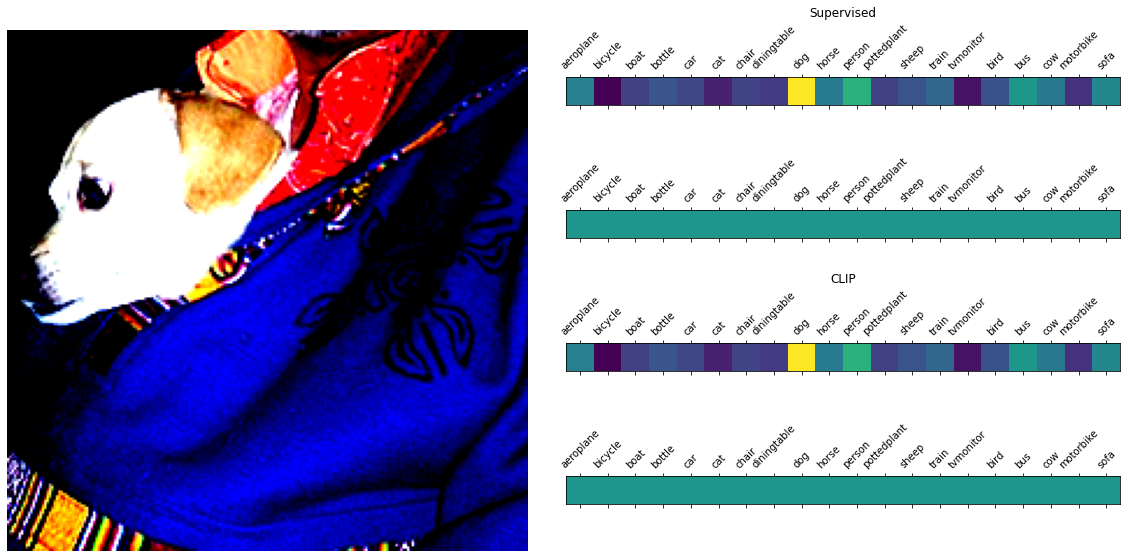

In [172]:
fig = plt.figure(figsize=(16, 8))

ax1 = plt.subplot2grid((4, 2), (0, 0), rowspan=4)
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax3 = plt.subplot2grid((4, 2), (1, 1))
ax4 = plt.subplot2grid((4, 2), (2, 1))
ax5 = plt.subplot2grid((4, 2), (3, 1))

ax1.imshow(torch.permute(ToTensor()(image), (1, 2, 0)))
ax1.set_axis_off()

ax2.matshow(logits_per_image)
ax2.set_yticks([])
ax2.set_xticks(np.arange(len(cats)), cats, rotation=45)
ax2.title.set_text('Supervised')
ax3.matshow(probs, vmin=-1, vmax=1)
ax3.set_yticks([])
ax3.set_xticks(np.arange(len(cats)), cats, rotation=45)

ax4.matshow(logits_per_image)
ax4.set_yticks([])
ax4.set_xticks(np.arange(len(cats)), cats, rotation=45)
ax4.title.set_text('CLIP')
ax5.matshow(probs, vmin=-1, vmax=1)
ax5.set_yticks([])
ax5.set_xticks(np.arange(len(cats)), cats, rotation=45)

plt.tight_layout()